## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Remove Insignificant Variables](#drop)**
    - 2.4 - **[Distribution of Variables](#dist)**
    - 2.5 - **[Missing Value Treatment](#null)**
    - 2.6 - **[Dummy Encode the Categorical Variables](#dummy)**
    - 2.7 - **[Scale the Data](#scale)**
    - 2.8 - **[Train-Test Split](#split)**
3. **[Logistic Regression (Full Model)](#logit)**
    - 3.1 - **[Identify the Best Cut-off Value](#cut_off)**
        - 3.1.1 - **[Youden's Index](#youden)**
        - 3.1.2 - **[Cost-based Method](#cost)**
4. **[Recursive Feature Elimination (RFE)](#rfe)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [294]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [295]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the first five observations.

In [296]:
# load the csv file
# store the data in 'df_admissions'
df = pd.read_csv('F:/PROJECTS/ML/Ongoing/Credit card default/Bank_Personal_Loan_Modelling.csv')

# display first five observations using head()
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.600000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.500000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.000000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.700000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.000000,2,0,0,0,0,0,1


**Let us now see the number of variables and observations in the data.**

In [297]:
# use 'shape' to check the dimension of data
df.shape

(5000, 14)

**Interpretation:** The data has 5000 observations and 14 variables.

<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [298]:
# use 'dtypes' to check the data type of a variable
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

**Interpretation:** Now, all the variables have the correct data type.

<a id="drop"></a>
## 2.3 Remove Insignificant Variables

In [299]:
# drop the column 'Serial No.' using drop()
# 'axis = 1' drops the specified column
df = df.drop(['ID','ZIP Code'], axis = 1)

<a id="dist"></a>
## 2.4 Distribution of Variables

**Distribution of numeric independent variables.**

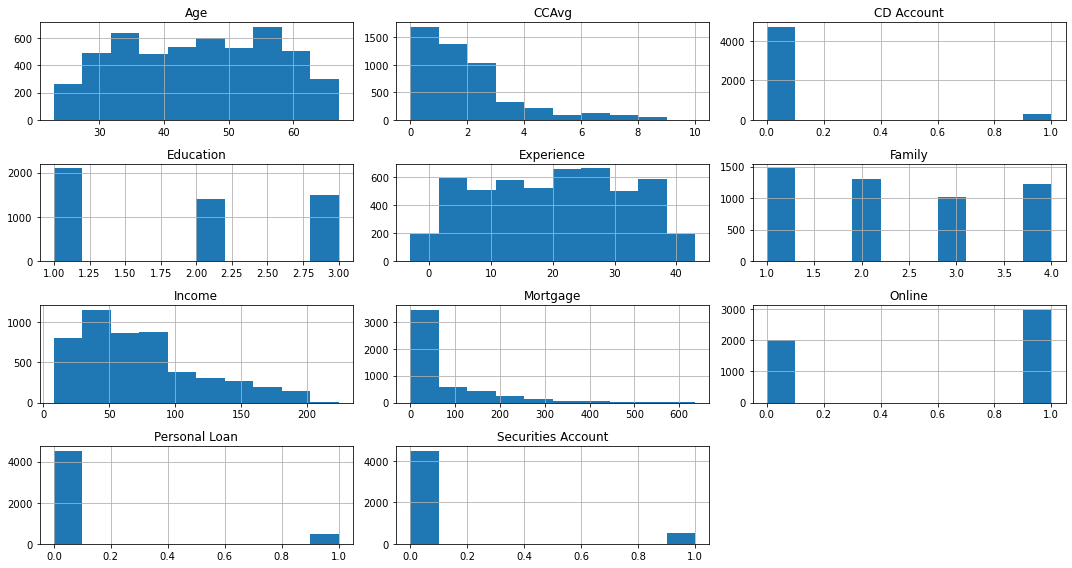

Skewness:


Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
dtype: float64

In [200]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column
df.drop('CreditCard', axis = 1).hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# skew() returns the coefficient of skewness for each variable
df.drop('CreditCard', axis = 1).skew()

**Interpretation:** The above plot indicates that all the variables are not normally distributed.

####  TARGET COLUMN DISTRIBUTION

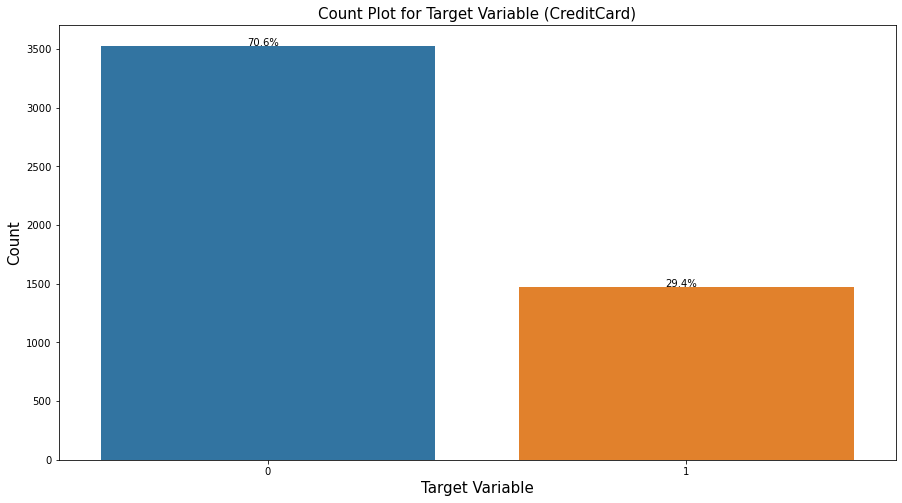

In [201]:
# consider only the target variable
df_target = df['CreditCard'].copy()

# get counts of 0's and 1's in the 'Chance of Admit' variable
df_target.value_counts()

# plot the countplot of the variable 'Chance of Admit'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (CreditCard)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

**Interpretation:** The above plot shows that there is imbalance in the target variable.

<a id="null"></a>
## 2.5 Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [178]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
CreditCard,0,0.000000
Online,0,0.000000
CD Account,0,0.000000
Securities Account,0,0.000000
Personal Loan,0,0.000000
Mortgage,0,0.000000
Education,0,0.000000
CCAvg,0,0.000000
Family,0,0.000000
Income,0,0.000000


**Interpretation:** The above output shows that there are no missing values in the data.

#### Filter numerical and categorical variables.

In [300]:
catdata = df[['Family',  'Education','Personal Loan',  'Securities Account' , 'CD Account', 'Online']]
numdata = df[df.columns.difference(['Family', 'Education','Personal Loan',  'Securities Account' , 'CD Account', 'Online'])]

In [301]:
numdata = numdata.drop(['CreditCard'],axis =1)

<a id="scale"></a>
## 2.7 Scale the Data 

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [302]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(numdata)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = numdata.columns)

## Variable summary

In [303]:
def variablesummary(x):
    return pd.DataFrame([x.skew(), x.sum(), x.mean(), x.median(),  x.std(), x.var(),x.min(),x.max()],
                  index=['skew', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN','MAX'])

In [304]:
variablesummary(df_num_scaled)

,Age,CCAvg,Experience,Income,Mortgage
skew,-0.029341,1.598443,-0.026325,0.841339,2.104002
SUM,0.000000,-0.000000,-0.000000,0.000000,0.000000
MEAN,0.000000,-0.000000,-0.000000,0.000000,0.000000
MEDIAN,-0.029524,-0.250611,-0.009122,-0.212348,-0.555524
STD,1.000100,1.000100,1.000100,1.000100,1.000100
VAR,1.000200,1.000200,1.000200,1.000200,1.000200
MIN,-1.948906,-1.108987,-2.014911,-1.428969,-0.555524
MAX,1.889859,4.613525,1.996667,3.263712,5.688108


## Variable Inflation

In [305]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def variableinflation(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [306]:
variableinflation(df_num_scaled)

,variables,VIF
0,Age,87.454123
1,CCAvg,1.722310
2,Experience,87.396571
3,Income,1.788110
4,Mortgage,1.045735


In [209]:
## Age and Experience are highhly correlated

In [307]:
df_num_scaled = df_num_scaled.drop(['Age'],axis = 1)

## OUTLIER ANALYSIS

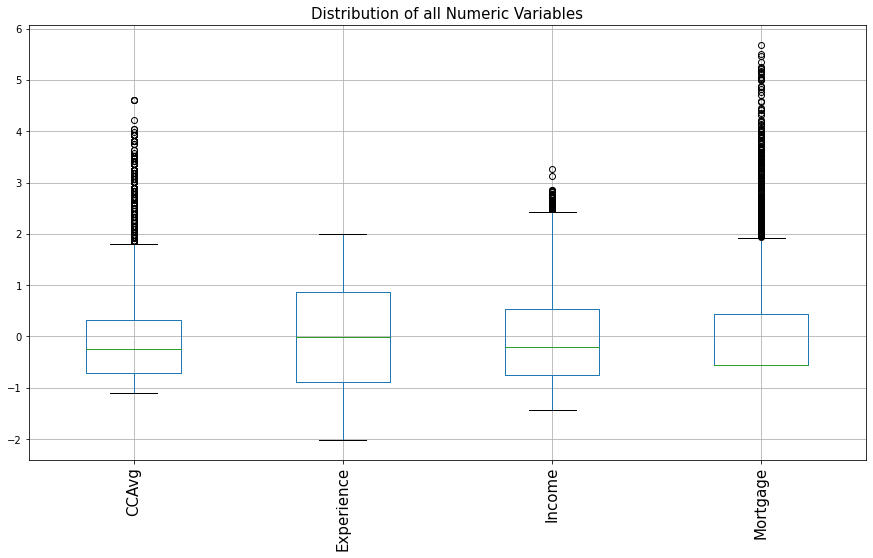

In [211]:
## 3 - Boxplot Analysis
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))
# plot a boxplot to visualize the outliers in all the numeric variables
df_num_scaled .boxplot()
# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)
# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)
# display the plot
plt.show()

## FIXING OUTLIERS

In [308]:
## Capping (Winzorization)
for i in df_num_scaled.columns:
    q1 = df_num_scaled[i].quantile(0.25)
    q3 = df_num_scaled[i].quantile(0.75)
    IQR = q3-q1
    UB = q3 + 1.5*IQR
    LB = q1 - 1.5*IQR
    UC = df_num_scaled[i].quantile(0.99)
    LC = df_num_scaled[i].quantile(0.01)
    for ind1 in df_num_scaled[i].index:
        if df_num_scaled.loc[ind1,i] > UB:
            df_num_scaled.loc[ind1,i] = UC
        if df_num_scaled.loc[ind1,i] < LB:
            df_num_scaled.loc[ind1,i] = LC


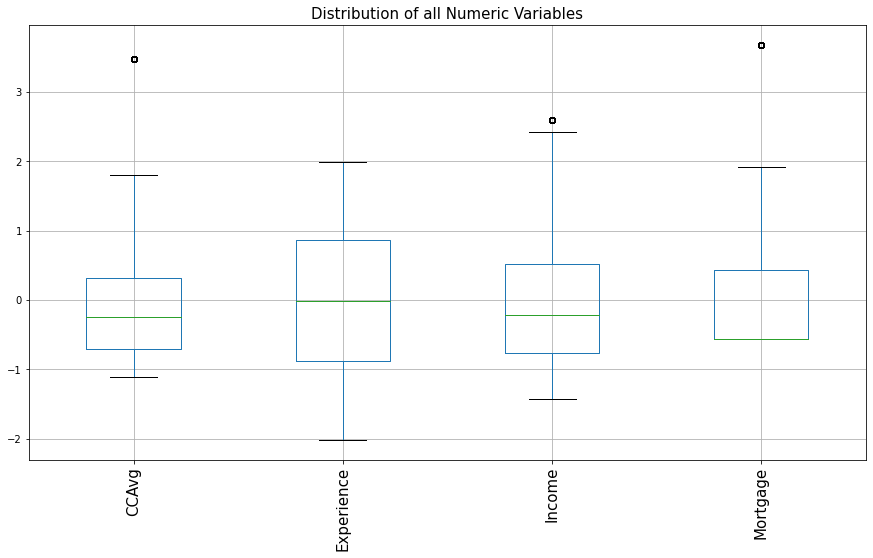

In [309]:
## 3 - Boxplot Analysis
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))
# plot a boxplot to visualize the outliers in all the numeric variables
df_num_scaled .boxplot()
# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)
# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)
# display the plot
plt.show()

#### Concatenate scaled numerical and dummy encoded categorical variables.

In [310]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num_scaled, catdata], axis = 1)

# display first five observations
X.head()

,CCAvg,Experience,Income,Mortgage,Family,Education,Personal Loan,Securities Account,CD Account,Online
0,-0.193385,-1.666078,-0.538229,-0.555524,4,1,0,1,0,0
1,-0.250611,-0.096330,-0.864109,-0.555524,3,1,0,1,0,0
2,-0.536736,-0.445163,-1.363793,-0.555524,1,1,0,0,0,0
3,0.436091,-0.968413,0.569765,-0.555524,1,2,0,0,0,0
4,-0.536736,-1.055621,-0.625130,-0.555524,4,2,0,0,0,0


## Distribution Analysis - After Scaling

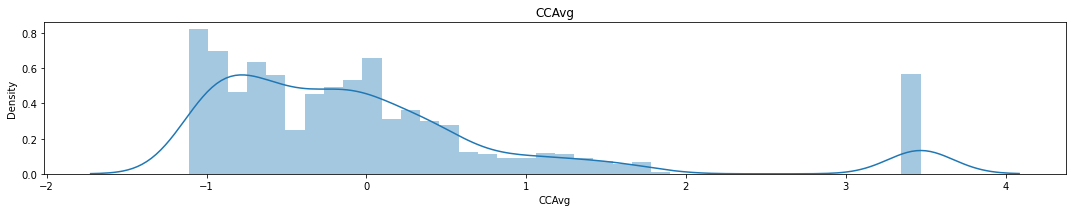

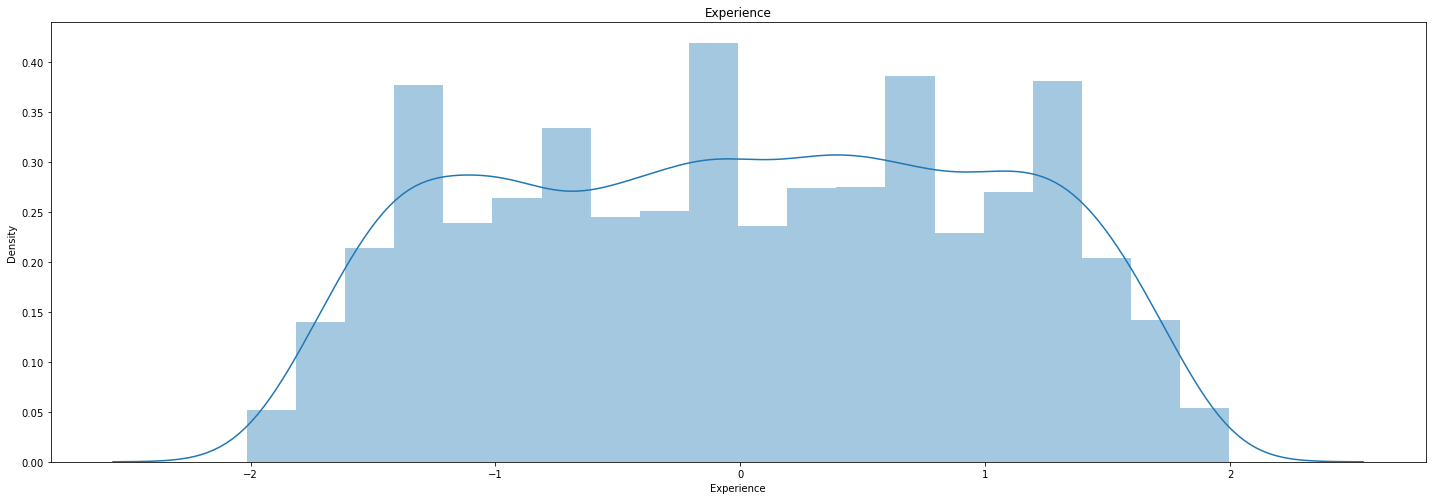

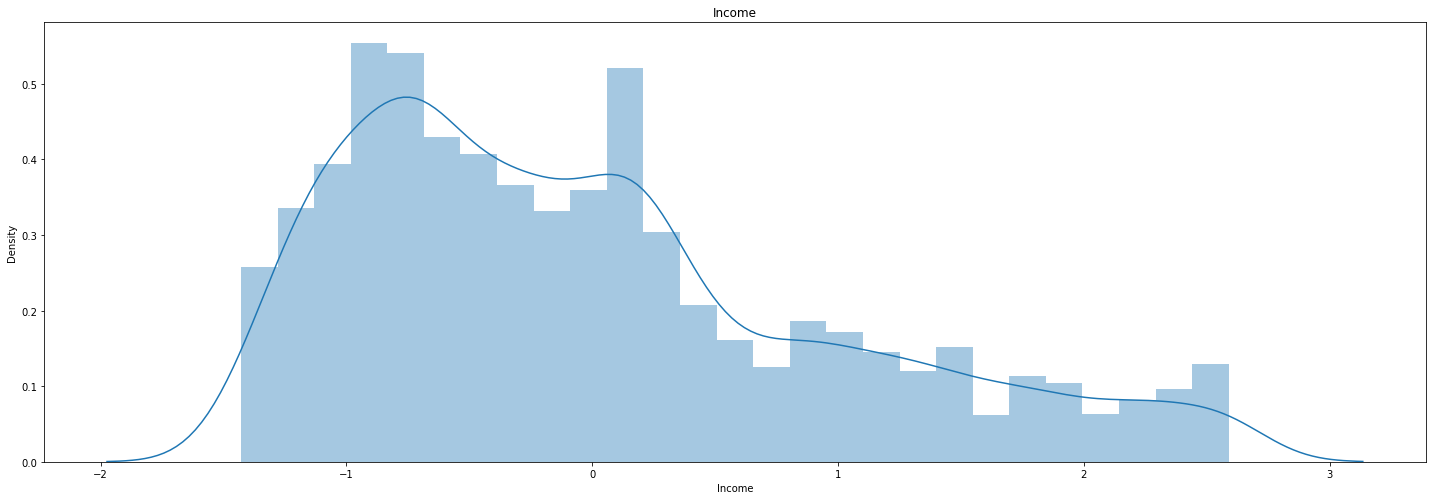

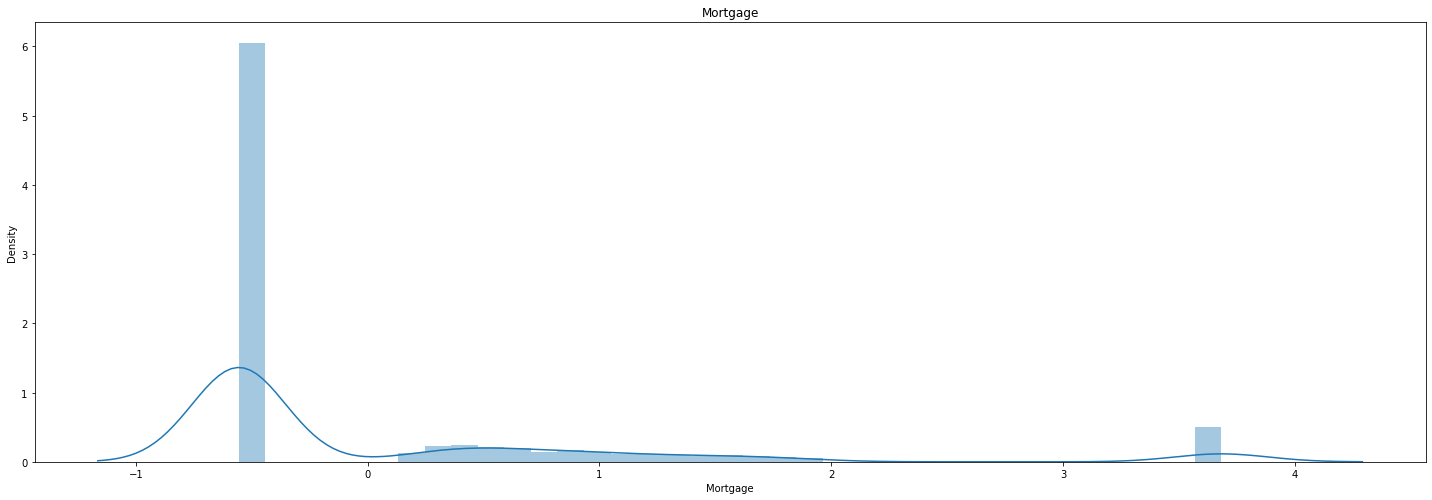

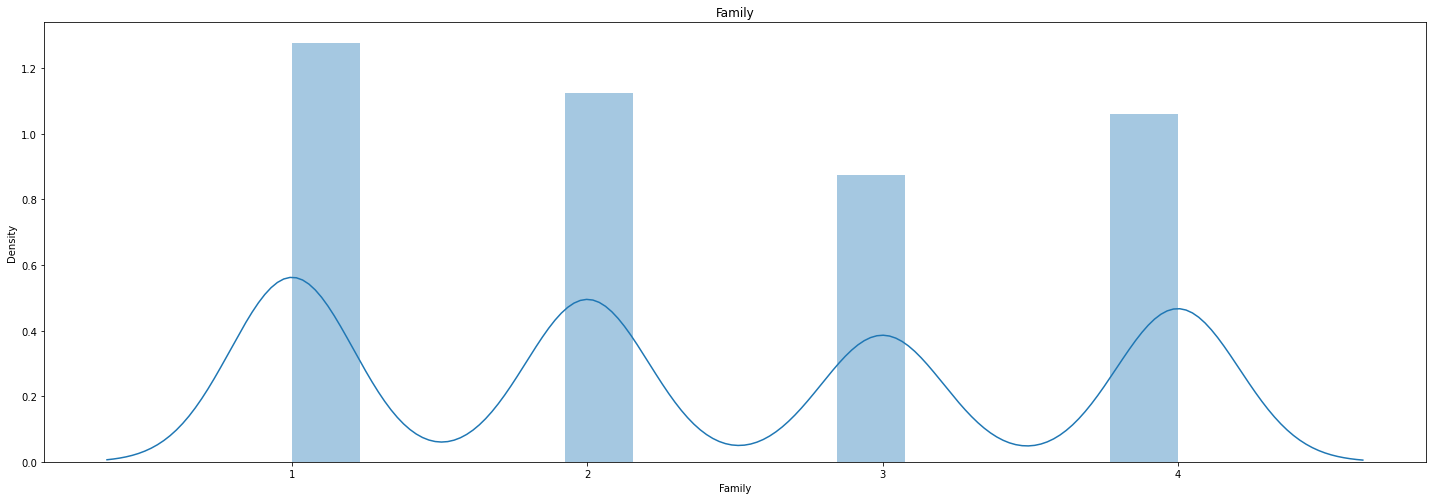

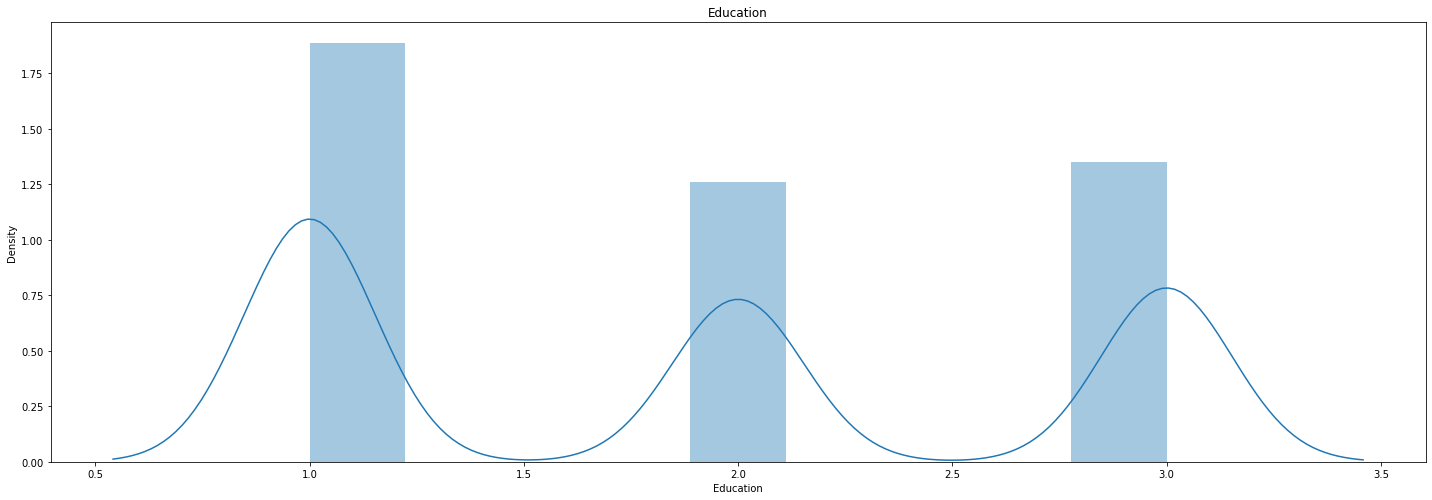

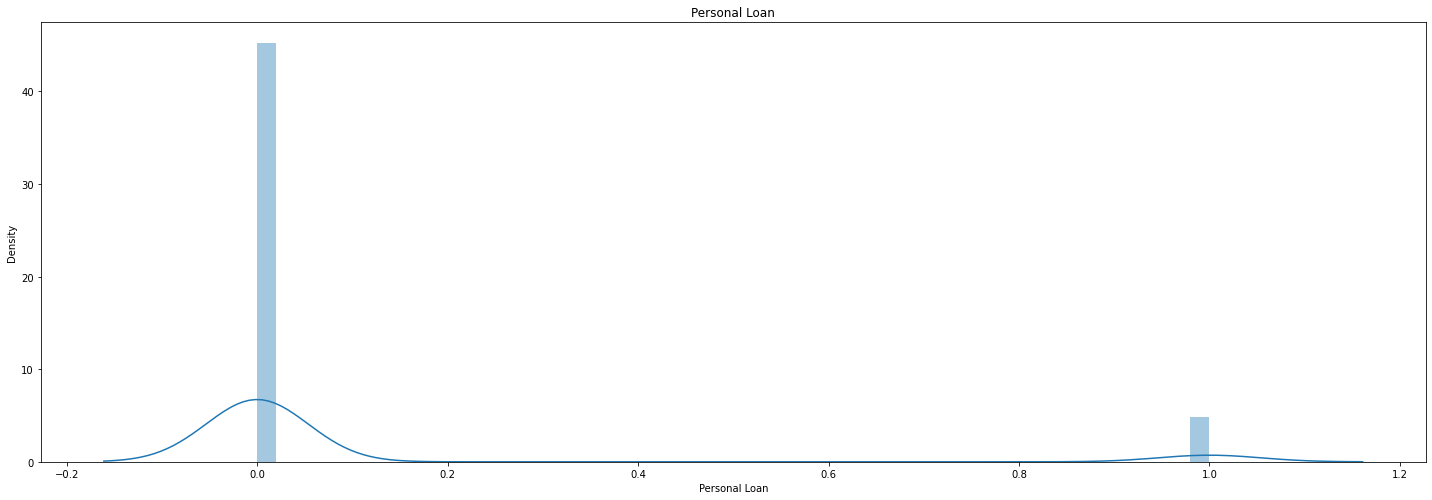

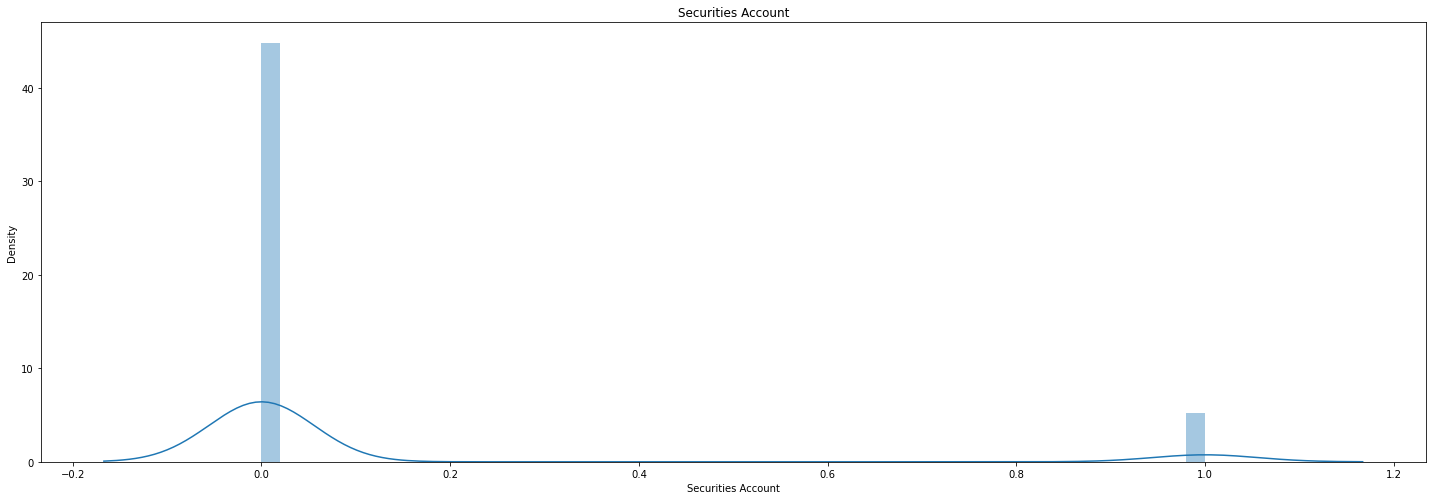

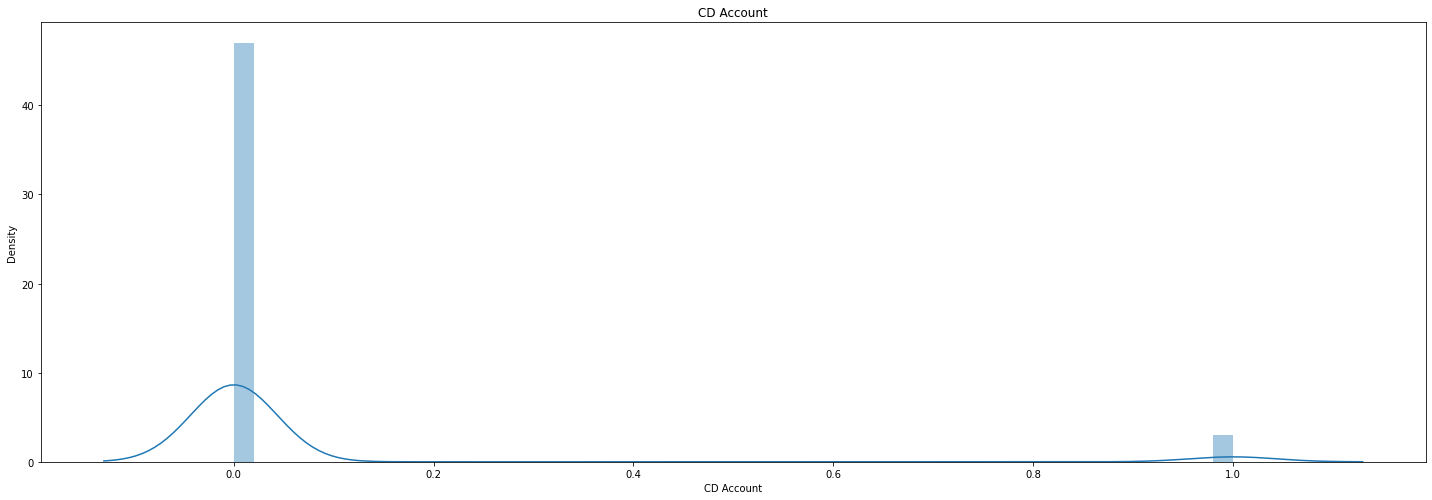

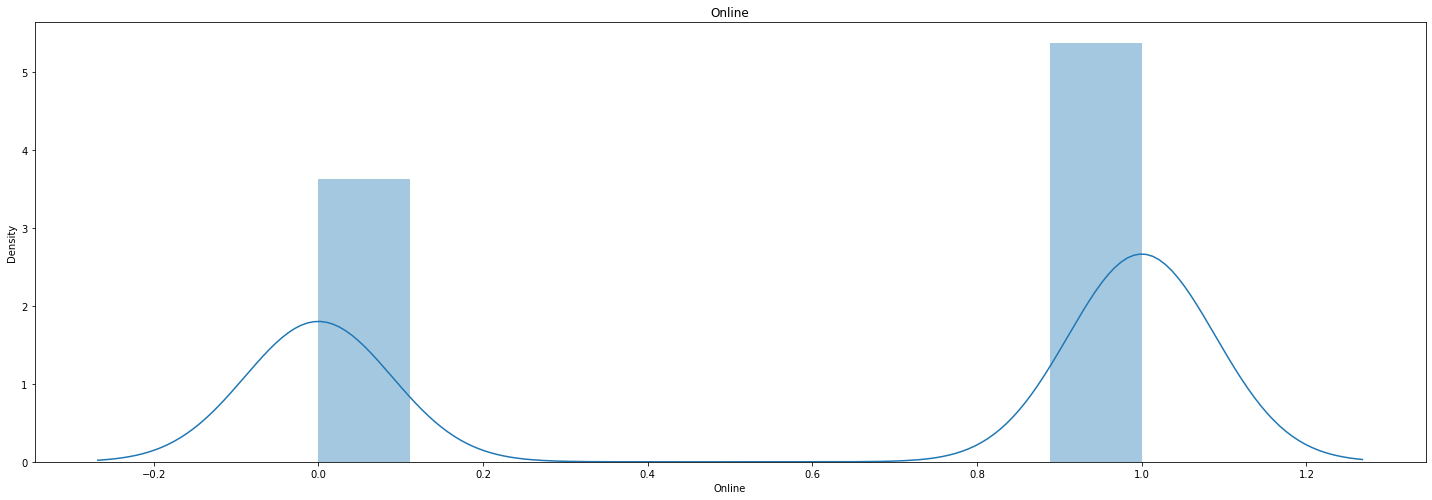

<Figure size 1440x1440 with 0 Axes>

In [215]:
## 1 - Distplot Analysis
row = 3
col = 1
count = 1
for i in X:
    plt.subplot(row,col,count)
    plt.title(i)
    sns.distplot(X[i])
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(20,20))

In [311]:
variablesummary(X)

,CCAvg,Experience,Income,Mortgage,Family,Education,Personal Loan,Securities Account,CD Account,Online
skew,1.822322,-0.026325,0.831471,2.131042,0.155221,0.227093,2.743607,2.588268,3.691714,-0.394785
SUM,239.773269,-0.000000,-3.476060,215.586307,11982.000000,9405.000000,480.000000,522.000000,302.000000,2984.000000
MEAN,0.047955,-0.000000,-0.000695,0.043117,2.396400,1.881000,0.096000,0.104400,0.060400,0.596800
MEDIAN,-0.250611,-0.009122,-0.212348,-0.555524,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000
STD,1.128502,1.000100,0.998120,1.113944,1.147663,0.839869,0.294621,0.305809,0.238250,0.490589
VAR,1.273517,1.000200,0.996243,1.240872,1.317130,0.705380,0.086801,0.093519,0.056763,0.240678
MIN,-1.108987,-2.014911,-1.428969,-0.555524,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
MAX,3.469022,1.996667,2.590225,3.682378,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## UNDERSAMPLING - DATA BALANCING

In [312]:
# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X,df_target)
# summarize class distribution
print(Counter(y_over))

Counter({0: 1470, 1: 1470})


<a id="split"></a>
## 2.8 Train-Test Split

Before applying various classification techniques to predict the admission status of the student, let us split the dataset in train and test set.

In [313]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, random_state = 10, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (2058, 10)
y_train (2058,)
X_test (882, 10)
y_test (882,)


#### Create a generalized function to create a dataframe containing the scores for the models.

In [314]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

<a id="logit"></a>
# 3. Logistic Regression (Full Model)

#### Build a full logistic model on a training dataset.

In [315]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.639080
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             CreditCard   No. Observations:                 2058
Model:                          Logit   Df Residuals:                     2048
Method:                           MLE   Df Model:                            9
Date:                Sun, 18 Jul 2021   Pseudo R-squ.:                 0.07775
Time:                        16:08:54   Log-Likelihood:                -1315.2
converged:                       True   LL-Null:                       -1426.1
Covariance Type:            nonrobust   LLR p-value:                 8.908e-43
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
CCAvg                 -0.0585      0.055     -1.063      0.288      -0.166       0.049
Exper

**Interpretation:** The `Pseudo R-squ.` obtained from the above model summary is the value of `McFadden's R-squared`. This value can be obtained from the formula:

<p style='text-indent:25em'> <strong> McFadden's R-squared = $ 1 - \frac{Log-Likelihood}{LL-Null} $</strong> </p>

Where,<br>
Log-Likelihood: It is the maximum value of the log-likelihood function<br>
LL-Null: It is the maximum value of the log-likelihood function for the model containing only the intercept 

The LLR p-value is less than 0.05, implies that the model is significant.

There are different types of `pseudo R-squared` such as `Cox & Snell R-squared`, `Nagelkerke R-squared` and so on.

**Cox & Snell R-squared:** The convergence of the logistic model can be determined by the R-squared value. It is given by the formula:

<p style='text-indent:25em'> <strong> Cox & Snell R-squared = $ 1 - (\frac{L(M_{Intercept})}{L(M_{Full})})^{2/N} $</strong> </p>

Where,<br> 
L(M): The conditional probability of target variable given the independent variables<br>
N: Total number of observations

**Note:** The maximum of Cox & Snell R-squared is always less than 1. It is equal to $(1 - (L(M_{Intercept})^{2/N})$



**Nagelkerke R-squared:** It is defined as the ratio of Cox & Snell R-squared to the maximum of Cox & Snell R-squared. The formula is given as:

<p style='text-indent:25em'> <strong>Nagelkerke  R-squared = $ \frac{1 - (\frac{L(M_{Intercept})}{L(M_{Full})})^{2/N}}{1 -  (L(M_{Intercept})^{2/N}} $</strong> </p>



Thus, Nagelkerke R-squared can be equal to 1, if $L(M_{Full}) = 1$


**Calculate the AIC (Akaike Information Criterion) value.**

It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.

In [221]:
# 'aic' retuns the AIC value for the model
print('AIC:', logreg.aic)

AIC: 2641.11413411555


We can use the AIC value to compare different models created on the same dataset.

### Interpret the odds for each variable 

In [316]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 

# print the dataframe
df_odds

,Odds
CCAvg,0.943216
Experience,1.020985
Income,1.057927
Mortgage,0.930168
Family,1.027897
Education,1.030638
Personal Loan,0.322722
Securities Account,0.422660
CD Account,32.072033
Online,0.777061


**Interpretation:** 



odds_CCAvg = 0.935, it implies that the odds increases by a factor of 0.93 due to one unit increase in the CCAvg, keeping other variables constant

odds_Experience = 0.985, it implies that the odds increases by a factor of 0.98 due to one unit increase in the Experience, keeping other variables constant

odds_Income= 1.084, it implies that the odds  increases by a factor of 1.084 due to one unit increase in the Income, keeping other variables constant

odds_Mortage = 0.94, it implies that the odds  by a factor of 0.94 due to one unit increase in the Mortage, keeping other variables constant

odds_Family = 1.06, it implies that the odds increases by a factor of 1.06 due to one member increase in the Family, keeping other variables constant

odds_Education = 1.001, it implies that the odds  increases by a factor of 1  due to one unit increase in the Education, keeping other variables constant
 
odds_Personal Loan = 0.42, it implies that the odds  increases by a factor of 0.42  due to one unit increase in the Personal loan, keeping other variables constant


odds_Securities Account = 0.32, it implies that the odds  increases by a factor of 0.3  due to one unit increase in the Securities_amount, keeping other variables constant

odds_CD Account  = 34.76, it implies that the odds  increases by a factor of 34.7  due to one unit increase in the CD Account, keeping other variables constant

odds_Online = 0.7, it implies that the odds  increases by a factor of 0.7  due to one unit increase in the Online, keeping other variables constant

**Do predictions on the test set.**

In [251]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

675    0.527831
862    0.265091
183    0.506967
2061   0.923907
955    0.583447
dtype: float64

Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.4. i.e. if 'y_pred_prob' is less than 0.4, then consider it to be 0 else consider it to be 1.

In [252]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.4 else 1 for x in y_pred_prob]

In [253]:
# print the first five observations of y_pred
y_pred[0:5]

[1, 0, 1, 1, 1]

#### Plot the confusion matrix.

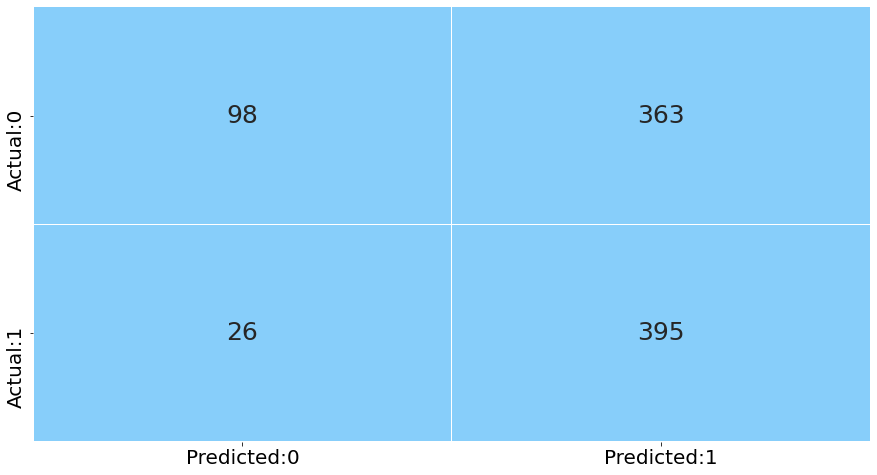

In [317]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [318]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

**Compute various performance metrics.**

**Precision:** It is defined as the ratio of true positives to the total positive predictions.

In [319]:
# calculate the precision value
precision = TP / (TP+FP)

# print the value
precision

0.521108179419525

**Recall:** It is the ratio of true positives to the total actual positive observations. It is also known as, `Sensitivity` or `True Positive Rate`.

In [320]:
# calculate the recall value
recall = TP / (TP+FN)

# print the value
recall

0.9382422802850356

**Specificity:** It is the ratio of true negatives to the total actual negative observations.

In [321]:
# calculate the specificity value
specificity = TN / (TN+FP)

# print the value
specificity

0.21258134490238612

**f1-score:** It is defined as the harmonic mean of precision and recall.

In [322]:
# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))

# print the f1_score
f1_score

0.6700593723494486

**Accuracy:** It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the dataset is imbalanced.

In [323]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

0.5589569160997733

We can also calculate the above measures using the `classification_report()`

In [324]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.79      0.21      0.34       461
           1       0.52      0.94      0.67       421

    accuracy                           0.56       882
   macro avg       0.66      0.58      0.50       882
weighted avg       0.66      0.56      0.49       882



**Interpretation:** 

From the above output, we can infer that the recall of the positive class is known as `sensitivity` and the recall of the negative class is `specificity`.

`support` is the number of observations in the corresponding class.

The `macro average` in the output is obtained by averaging the unweighted mean per label and the `weighted average` is given by averaging the support-weighted mean per label.

**Kappa score:** It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

In [262]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.14576164843318185


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.4) is 0.14, we can say that there is less agreement between the actual and predicted values.

#### Plot the ROC curve.

ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of separability of the model.

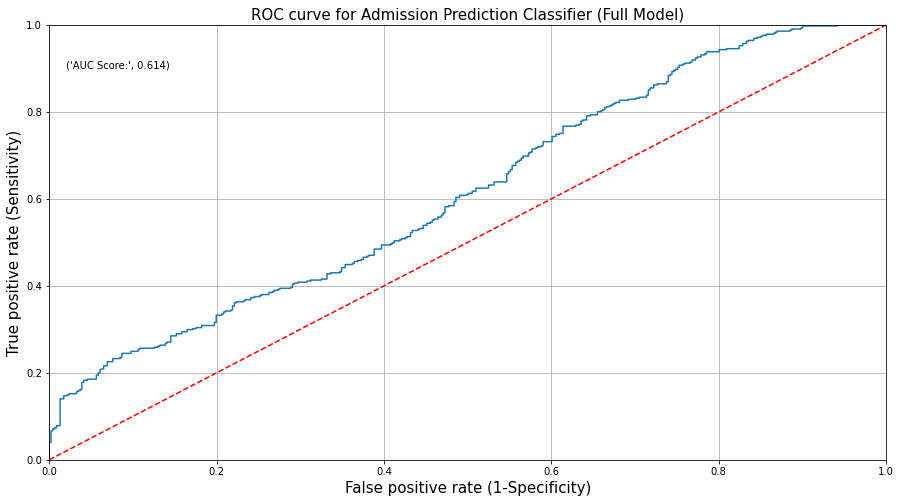

In [325]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>


<a id="cut_off"></a>
## 3.1 Identify the Best Cut-off Value

**Tabulate the performance measures for different cut-offs.**

The performance measures that we obtained above, are for the cut_off = 0.5. Now, let us consider a list of values as cut-off and calculate the different performance measures.

In [326]:
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(logreg, value)

In [327]:
# print the score card 
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.500000,0.477324,1.000000,0.477324,0.000000,0.646201
1,0.200000,0.503254,0.478953,1.000000,0.480726,0.006214,0.647692
2,0.300000,0.546177,0.502475,0.964371,0.527211,0.088811,0.660700
3,0.400000,0.560227,0.511658,0.938242,0.543084,0.116250,0.662196
4,0.500000,0.553408,0.543909,0.456057,0.557823,0.107570,0.496124
5,0.600000,0.563873,0.873239,0.147268,0.582766,0.132525,0.252033
6,0.700000,0.563873,0.873239,0.147268,0.582766,0.132525,0.252033
7,0.800000,0.564751,0.909091,0.142518,0.583900,0.134420,0.246407
8,0.900000,0.547815,0.934783,0.102138,0.568027,0.099474,0.184154


**Interpretation:** The above dataframe shows that, the model cut_off probability 0.4, returns the f1-score


## Hyperparamter Tuned Model

In [238]:
from pycaret.classification import *
#intialize the setup
exp_clf = setup(df, target = 'CreditCard')

,Description,Value
0,session_id,6109
1,Target,CreditCard
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5000, 12)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [239]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7314,0.5998,0.1250,0.8125,0.2167,0.1493,0.2468
1,0.7400,0.6087,0.1731,0.7826,0.2835,0.1970,0.2817
2,0.7400,0.6331,0.1635,0.8095,0.2720,0.1913,0.2833
3,0.7486,0.6108,0.1635,0.9444,0.2787,0.2094,0.3298
4,0.7400,0.6304,0.1810,0.7917,0.2946,0.2059,0.2911
5,0.7371,0.6636,0.1619,0.8095,0.2698,0.1887,0.2809
6,0.7286,0.6353,0.1143,0.8571,0.2017,0.1410,0.2482
7,0.7486,0.6085,0.1810,0.9048,0.3016,0.2240,0.3334
8,0.7200,0.6014,0.1429,0.6522,0.2344,0.1419,0.2038
9,0.7507,0.6106,0.2115,0.8148,0.3359,0.2429,0.3272


In [240]:
tuned  = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7314,0.6012,0.1250,0.8125,0.2167,0.1493,0.2468
1,0.7400,0.6096,0.1731,0.7826,0.2835,0.1970,0.2817
2,0.7400,0.6332,0.1635,0.8095,0.2720,0.1913,0.2833
3,0.7486,0.6110,0.1635,0.9444,0.2787,0.2094,0.3298
4,0.7400,0.6262,0.1810,0.7917,0.2946,0.2059,0.2911
5,0.7371,0.6643,0.1619,0.8095,0.2698,0.1887,0.2809
6,0.7286,0.6337,0.1143,0.8571,0.2017,0.1410,0.2482
7,0.7486,0.6086,0.1810,0.9048,0.3016,0.2240,0.3334
8,0.7200,0.5987,0.1429,0.6522,0.2344,0.1419,0.2038
9,0.7507,0.6106,0.2115,0.8148,0.3359,0.2429,0.3272


In [241]:
print(tuned)

LogisticRegression(C=0.465, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6109, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Building with tuned paramters

In [242]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.465, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6109, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model.fit(X_over,y_over)
model.score(X_over,y_over)

0.5792517006802721

In [243]:
ypredd = model.predict(X_over)

In [244]:
##Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_over,ypredd)

0.5792517006802721

In [245]:
## F1
from sklearn.metrics import f1_score
f1_score(y_over,ypredd)

0.5309063329541145

#### In the above method, we passed the list of values for the cut-off. But, this method is not efficient as one can pass different values and obtain a cut-off based on the passed values.

#### To obtain the optimal cut-off value we use the following methods:

1. Youden's Index
2. Cost-based Method

<a id="youden"></a>
### 3.1.1 Youden's Index

Youden's Index is the classification cut-off probability for which the (Sensitivity + Specificity - 1) is maximized.<br>

<p style='text-indent:12em'> <strong>Youden's Index = max(Sensitivity + Specificity - 1) = max(TPR + TNR - 1) = max(TPR - FPR) </strong> </p>

i.e. select the cut-off probability for which the (TPR - FPR) is maximum.

In [266]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.244656,0.086768,0.552465,0.157888
1,0.232779,0.075922,0.554982,0.156857
2,0.225653,0.069414,0.557295,0.156239
3,0.907363,0.752711,0.423033,0.154652
4,0.767221,0.613883,0.448873,0.153338


As we can see that the optimal cut-off probability is approximately 0.55. Let us consider this cut-off to predict the target values. i.e. if 'y_pred_prob' is less than 0.55, then consider it to be 0 else consider it to be 1.

In [290]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.55 else 1 for x in y_pred_prob]

#### Plot the confusion matrix.

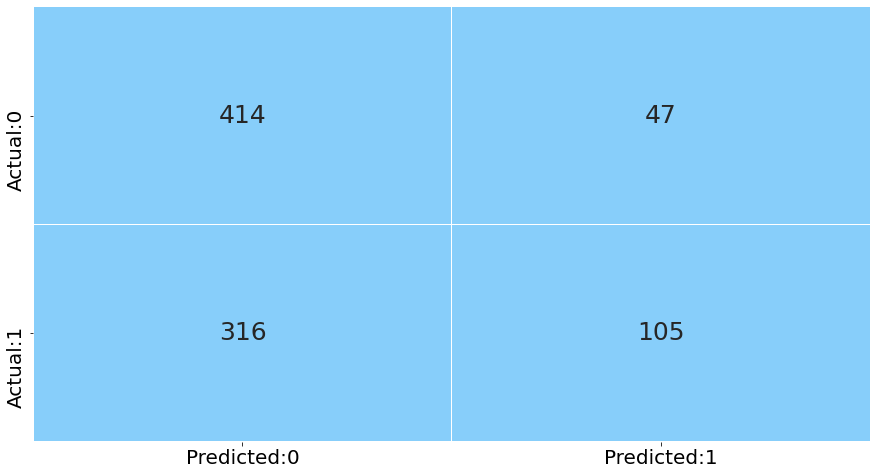

In [291]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_youden)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

**Compute various performance metrics.**

In [292]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_youden)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.57      0.90      0.70       461
           1       0.69      0.25      0.37       421

    accuracy                           0.59       882
   macro avg       0.63      0.57      0.53       882
weighted avg       0.63      0.59      0.54       882



**Interpretation:** From the above output, we can see that the model with cut-off = 0.62, is 85% accurate. The specificity and the sensitivity are nearly balanced.

In [293]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_youden)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.15165791384253402


<a id="cost"></a>
### 3.1.2 Cost-based Method

The full logistic regression model (build in section 3), have different values for false positives (FP) and false negatives (FN). Thus, we can use the cost-based method to calculate the optimal value of the cut-off. In this method, we find the optimal value of the cut-off for which the total cost is minimum. The total cost is given by the formula:

<p style='text-indent:25em'> <strong>total_cost = FN x C_1 + FP x C_2 </strong> </p>

Where,<br>
C_1: It is the cost of false negatives <br>
C_2: It is the cost of false positives

The cost values can be decided using business knowledge.

In [271]:
# define a function to calculate the total_cost for a cut-off value
# pass the actual values of y, predicted probabilities of y, cost for FN and FP
def calculate_total_cost(actual_value, predicted_value, cost_FN, cost_FP):

    # pass the actual and predicted values to calculate the confusion matrix
    cm = confusion_matrix(actual_value, predicted_value)           
    
    # create an array of the confusion matrix
    cm_array = np.array(cm)
    
    # return the total_cost
    return cm_array[1,0] * cost_FN + cm_array[0,1] * cost_FP

# create an empty dataframe to store the cost for different probability cut-offs
df_total_cost = pd.DataFrame(columns = ['cut-off', 'total_cost'])

# initialize i to '0' corresponding to the 1st row in the dataframe
i = 0

# use for loop to calculate 'total_cost' for each cut-off probability value
# call the function 'calculate_total_cost' to calculate the cost
# pass the actual y-values
# calculate the predicted y-values from 'y_pred_prob' for the cut-off probability value
# assign the costs 3.5 and 2 to False Negatives and False Positives respectively
# add the obtained 'cut_off' and 'total_cost' at the ith index of the dataframe
for cut_off in range(10, 100):
    total_cost = calculate_total_cost(y_test,  y_pred_prob.map(lambda x: 1 if x > (cut_off/100) else 0), 3.5, 2) 
    df_total_cost.loc[i] = [(cut_off/100), total_cost] 
    
    # increment the value of 'i' for each row index in the dataframe 'df_total_cost'
    i += 1

In [272]:
# sort the dataframe based on the 'total_cost' in the ascending order
# print the first ten rows in the dataframe
df_total_cost.sort_values('total_cost', ascending = True).head(10)

,cut-off,total_cost
30,0.400000,817.000000
22,0.320000,821.500000
31,0.410000,823.500000
24,0.340000,824.000000
21,0.310000,826.000000
29,0.390000,827.000000
19,0.290000,827.000000
23,0.330000,828.500000
20,0.300000,829.500000
25,0.350000,830.000000


In [273]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_cost = [ 0 if x < 0.4 else 1 for x in y_pred_prob]

#### Plot the confusion matrix.

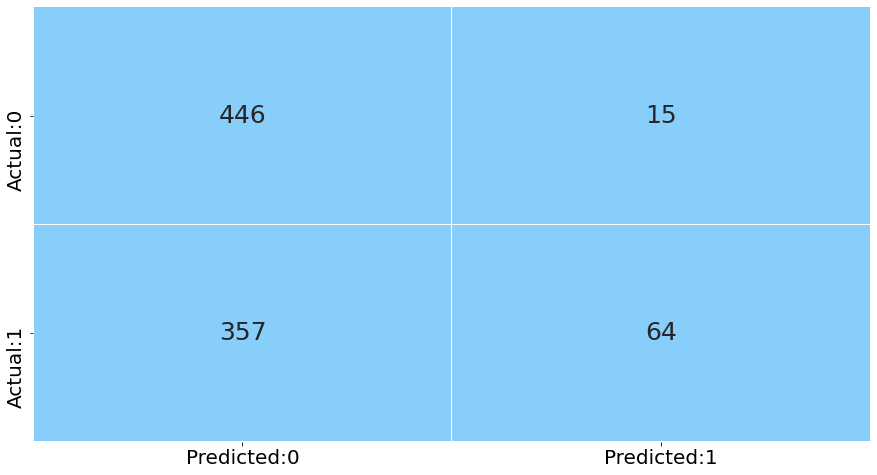

In [274]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_cost)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

**Compute various performance metrics.**

In [275]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_cost)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.56      0.97      0.71       461
           1       0.81      0.15      0.26       421

    accuracy                           0.58       882
   macro avg       0.68      0.56      0.48       882
weighted avg       0.68      0.58      0.49       882



**Interpretation:** From the above output, we can see that the model with cut-off = 0.58 is 86% accurate. 

In [276]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_cost)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.12384573891401984


<a id="rfe"></a>
# 4. Recursive Feature Elimination (RFE)

In the linear regression module, we learn about various techniques for selecting the significant features in the dataset. In this example, let us consider the RFE method for feature selection.

In [277]:
# consider the independent variables (without the intercept term)
# as, X_train and X_test contains the intercept term
# use 'iloc' to select the variables wthout intercept term 
X_train_rfe = X_train.iloc[:,1:]
X_test_rfe = X_test.iloc[:,1:]

# initiate logistic regression model to use in feature selection
logreg = LogisticRegression()

# build the RFE model
# pass the logistic regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator = logreg, n_features_to_select = 3)

# fit the RFE model on the train dataset using fit()
rfe_model = rfe_model.fit(X_train_rfe, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['Personal Loan', 'Securities Account', 'CD Account'], dtype='object')


#### Build the logisitc regression model using the variables obtained from RFE.

In [278]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
# consider the variables obtained from RFE method and the intercept term
logreg_rfe = sm.Logit(y_train, X_train[['Personal Loan', 'Securities Account', 'CD Account']]).fit()

# print the summary of the model
print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.641043
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             CreditCard   No. Observations:                 2058
Model:                          Logit   Df Residuals:                     2055
Method:                           MLE   Df Model:                            2
Date:                Sun, 18 Jul 2021   Pseudo R-squ.:                 0.07492
Time:                        10:47:25   Log-Likelihood:                -1319.3
converged:                       True   LL-Null:                       -1426.1
Covariance Type:            nonrobust   LLR p-value:                 3.977e-47
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Personal Loan         -0.8156      0.194     -4.212      0.000      -1.195      -0.436
Secur

**Calculate the AIC (Akaike Information Criterion) value.**

It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.

In [279]:
# 'aic' retuns the AIC value for the model
print('AIC:', logreg_rfe.aic)

AIC: 2644.534386581554


**Do predictions on the test set.**

In [281]:
# let 'y_pred_prob_rfe' be the predicted values of y
y_pred_prob_rfe = logreg_rfe.predict(X_test[['Personal Loan', 'Securities Account', 'CD Account']])

# print the y_pred_prob_rfe
y_pred_prob_rfe.head()

675    0.500000
862    0.253089
183    0.500000
2061   0.925779
955    0.500000
dtype: float64

Since the target variable can take only two values either 0 or 1. We consider the cut-off value 0.4. i.e. if 'y_pred_prob_rfe' is less than 0.4, then consider it to be 0 else consider it to be 1.

In [284]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_rfe = [ 0 if x < 0.4 else 1 for x in y_pred_prob_rfe]

In [285]:
# print the first five observations of y_pred_rfe
y_pred_rfe[0:5]

[1, 0, 1, 1, 1]

#### Plot the confusion matrix.

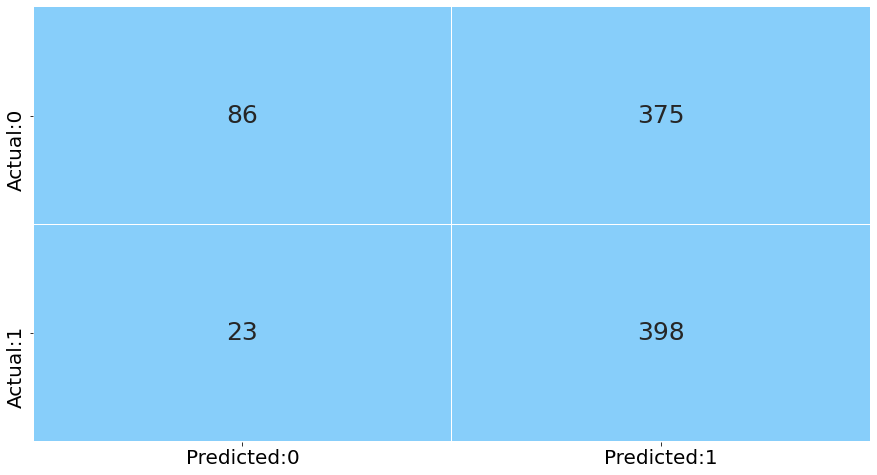

In [286]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_rfe)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

#### Compute the performance measures.

In [287]:
# performance measures obtained by classification_report()
result = classification_report(y_test, y_pred_rfe)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.79      0.19      0.30       461
           1       0.51      0.95      0.67       421

    accuracy                           0.55       882
   macro avg       0.65      0.57      0.48       882
weighted avg       0.66      0.55      0.48       882



**Interpretation:** From the above output, we can see that the model with cut-off = 0.6 is 84% accurate. 

In [288]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_rfe)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.1273014752313284


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.4) is 0.12.

#### Plot the ROC curve.

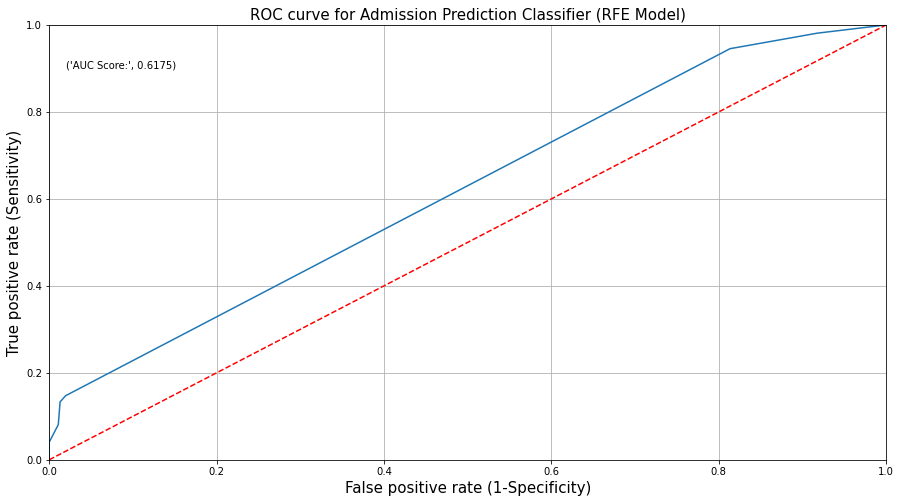

In [289]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rfe)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_rfe),4)))
                               
# plot the grid
plt.grid(True)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that our classifier (logistic regression with features obtained from RFE method) is away from the dotted line; with the AUC score 0.62

## REASONING

In [ ]:
The skewness of the data is pretty high and data transformation is needed

In [ ]:
The classification is a tad complex and a sigmoid function based logistic regression is a bit primitive for this dataset considering the inflation and skewness.

In [ ]:
Non linear models like random forest will perform well with hypertuning and stacked and voting classifiers might also lead better result.

In [ ]:
Hypertuning did not pay a great deal of improvement for the dataset for logistic regression.